# Analysis of data

[link to data](https://www.kaggle.com/datasets/uciml/mushroom-classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import os, sys
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.shape

(8124, 23)

In [4]:
#pd.set_option('display.max_columns', None)
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
cols = data.columns
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
#Encode texted data
data_le = data.copy()
le = LabelEncoder()
for col in data_le.columns:
    data_le[col] = le.fit_transform(data_le[col]) 

In [9]:
data_le.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


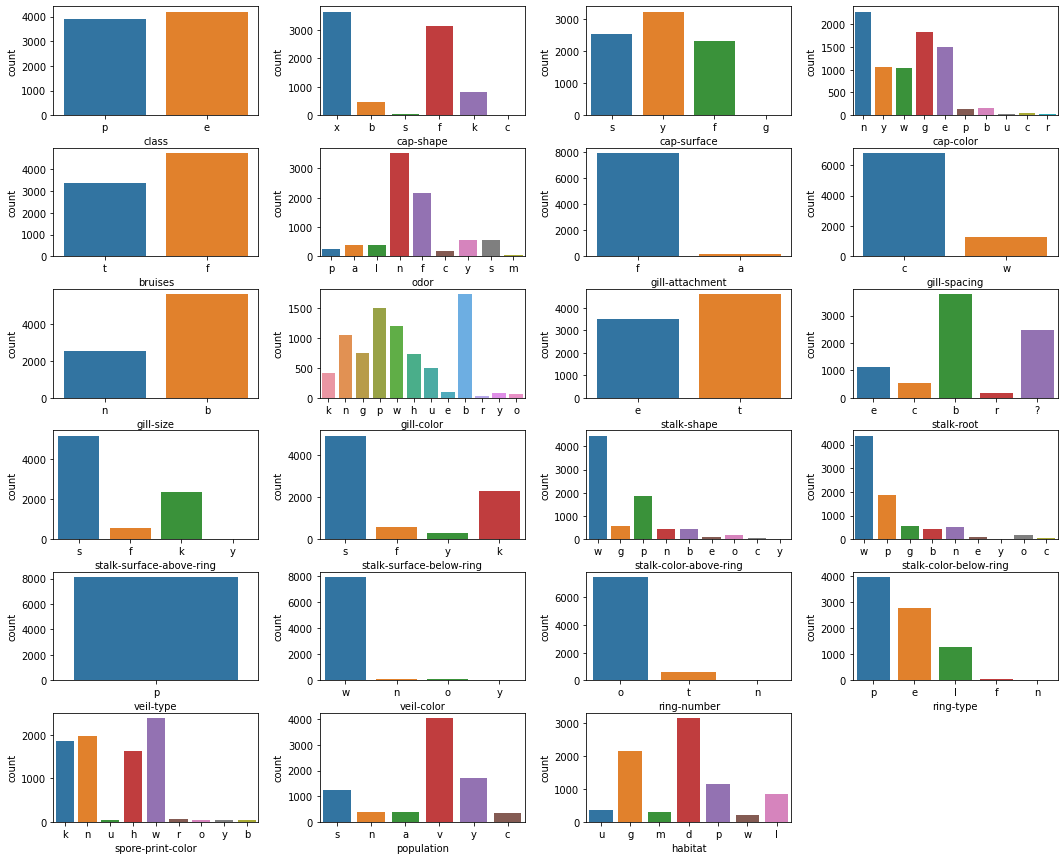

In [10]:
fig, axs = plt.subplots(6,4,figsize=(18,15),edgecolor='k',facecolor='w')
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for ax,feature in zip(axs.ravel(),data.columns):
    sns.countplot(x = feature, data = data,ax=ax)
axs[5,3].set_axis_off()

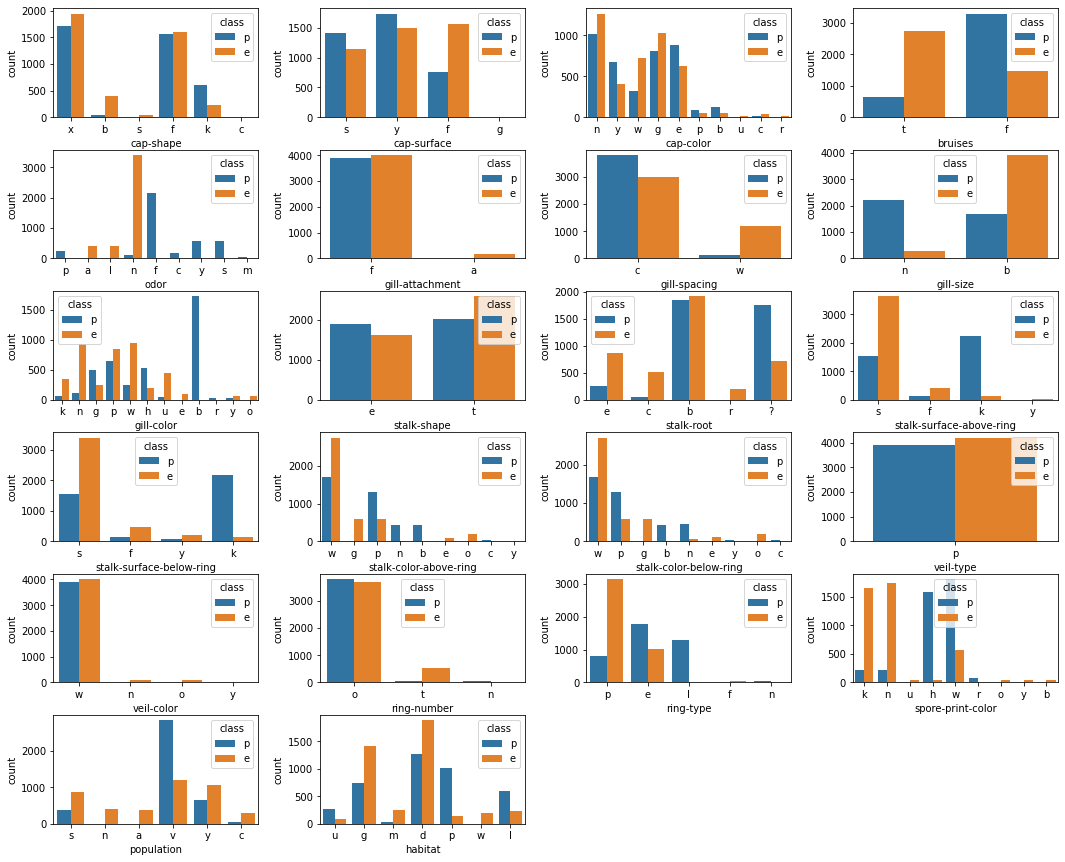

In [11]:
fig, axs = plt.subplots(6,4,figsize=(18,15),edgecolor='k',facecolor='w')
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for ax,feature in zip(axs.ravel(),data.columns[1:]):
    if feature != 'class':
        sns.countplot(x = feature, data = data, ax=ax, hue = 'class')
axs[5,2].set_axis_off()
axs[5,3].set_axis_off()
#plt.show()

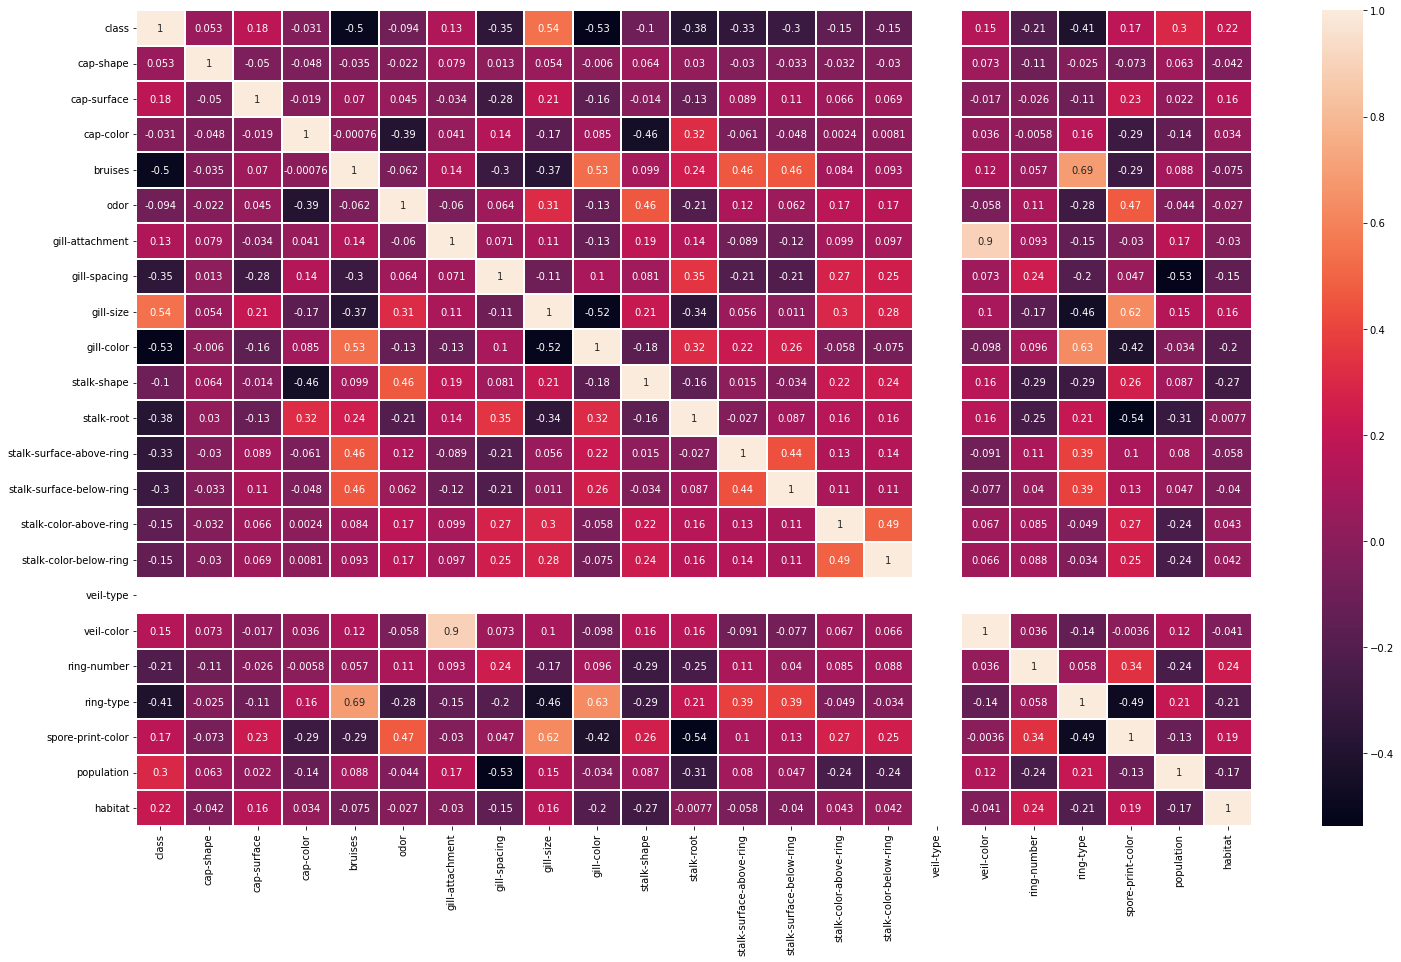

In [12]:
plt.figure(figsize=(25,15))
hm = sns.heatmap(data_le.corr(),cbar=True,annot=True,xticklabels=cols,yticklabels=cols,linewidths=2)
plt.show()

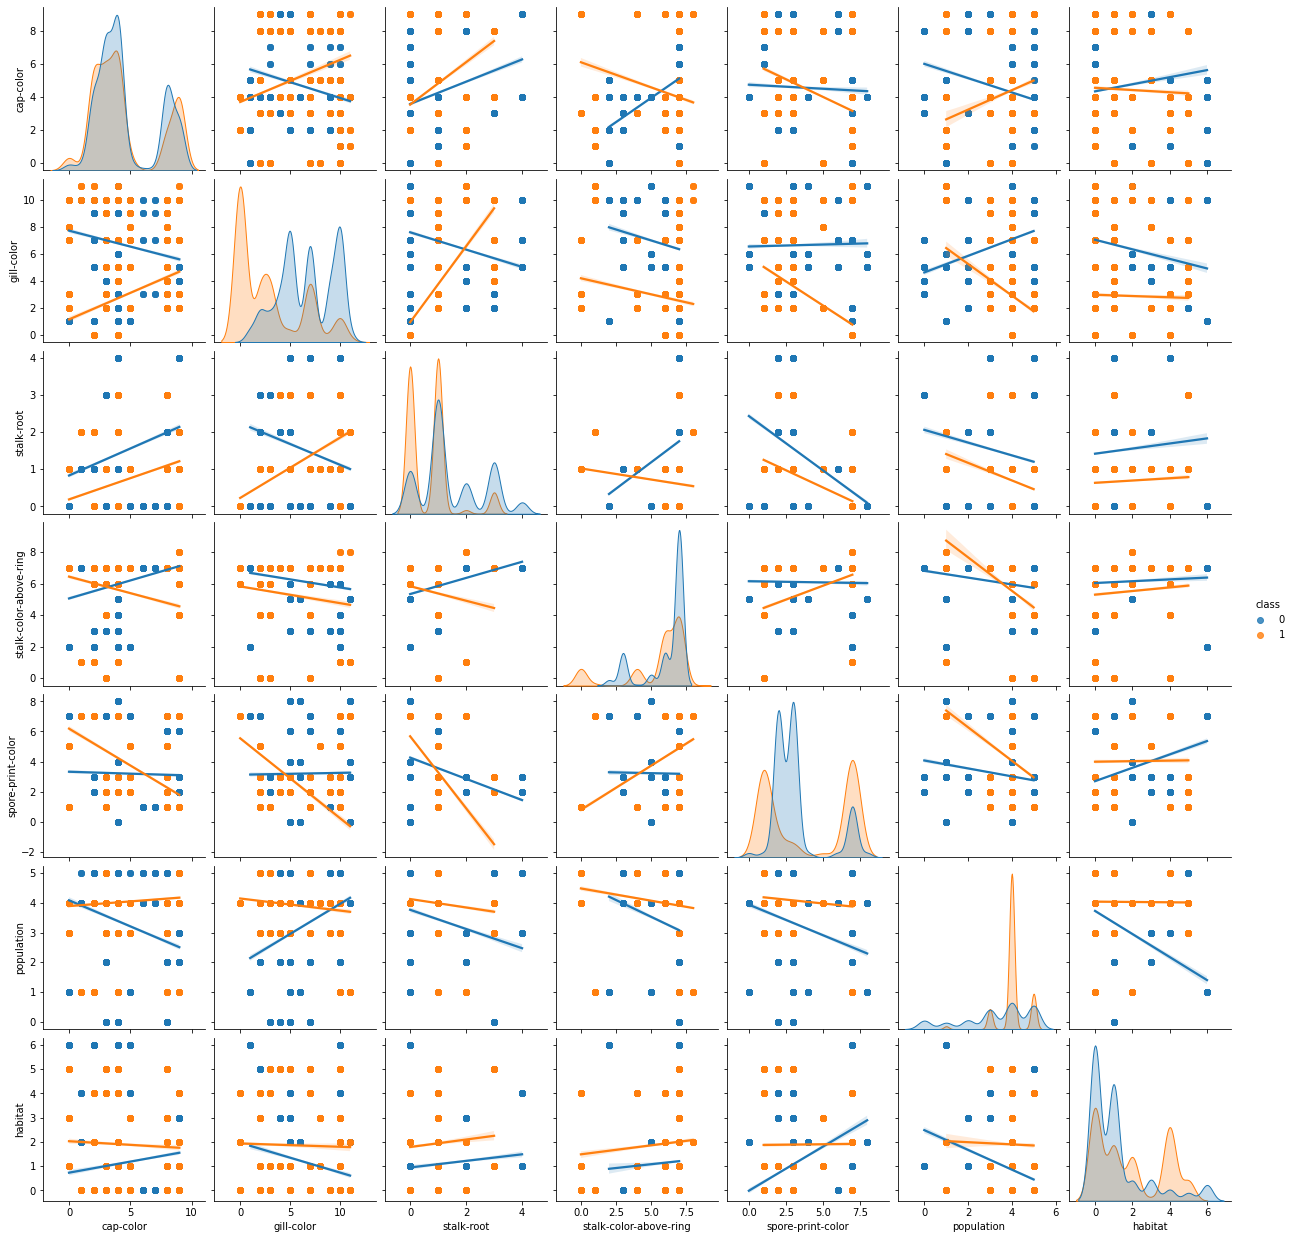

In [13]:
cols=['class','cap-color','gill-color','stalk-root','stalk-color-above-ring','spore-print-color','population','habitat']
sns.pairplot(data_le[cols], hue='class', kind='reg')

# Custom Classifier

In [14]:
class NeuralNet:
    
    def __init__(self, layers_sizes=[2,2], normalize = True, learning_rate = 0.01, num_iter = 15000, costs_iters=300, tol=1e-7, optimization=True):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.normalize = normalize
        self.layers_sizes = layers_sizes
        self.tol = tol
        self.layers = len(layers_sizes) + 1
        print("Layers: {}".format(self.layers))
        self.costs_iters = costs_iters
        self.optimization = optimization
    
    def get_params(self,deep=True):
        return {"learning_rate":self.learning_rate,"num_iter":self.num_iter}
    
    def set_params(self,**parameters):
        for parameter,value in parameters.items():
            setattr(self,parameter,value)
        return self
    
    def __normalize(self, X, mean = None, std = None):
        n = X.shape[0]
        m = mean
        if m is None:
            m = np.mean(X, axis=1).reshape((n, 1))
        s = std
        if s is None:
            s = np.std(X, axis=1).reshape((n, 1))
        X_new = (X - m) / (s+1e-50)
        return X_new, m, s

    def __sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def __sigmoid_derivative(self, A):
        return np.multiply(A, 1 - A)
    
    def __softmax(self, Z):
        e = np.exp(Z)
        return e/np.sum(e, axis=0, keepdims=True)
    
    def __initialize_parameters(self):
        W, b, SdW, Sdb = [], [], [], []
        
        for l in range(1,self.layers+1):
            W_l = np.random.randn(self.layers_sizes[l], self.layers_sizes[l-1]) * 0.01
            b_l = np.zeros((self.layers_sizes[l], 1))
            SdW_l = np.zeros((self.layers_sizes[l], self.layers_sizes[l-1]))
            Sdb_l = np.zeros((self.layers_sizes[l], 1))
            W.append(W_l)
            b.append(b_l)
            SdW.append(SdW_l)
            Sdb.append(Sdb_l)
        
        self.parameters = {"W" : W, "b" : b, "SdW" : SdW, "Sdb" : Sdb}
        
        for key in self.parameters:
            for key_i,i in zip(self.parameters[key],range(len(self.parameters[key]))):
                print("{}{}: {}".format(key,i+1,key_i.shape))
       
    def __forward_propagation(self, X):            
        W = self.parameters["W"]
        b = self.parameters["b"]
        Z, A = [], [] 

        A.append(X)
        for l in range(0,self.layers-1):
            Z_l = np.dot(W[l],A[l]) + b[l]
            A_l = self.__sigmoid(Z_l)
            Z.append(Z_l)
            A.append(A_l)
        
        l = self.layers-1
        Z_l = np.dot(W[l],A[l]) + b[l]
        A_l = self.__softmax(Z_l)
        Z.append(Z_l)
        A.append(A_l)
        
        cache = (Z,A)
        return A[-1], cache
    
    def compute_cost(self, A, Y):
        m = Y.shape[1]
        res = Y * np.log(A) + (1 - Y) * np.log(1 - A)
        J = -(1 / m) * np.sum(res)
        return J
    
    def __backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        
        W = self.parameters["W"]
        b = self.parameters["b"]
        (Z,A) = cache
        
        dZ, dW, db = [], [], []
        
        dZ_l = A[-1] - Y
        dW_l = 1. / m * np.dot(dZ_l, A[-2].T)
        db_l = 1. / m * np.sum(dZ_l, axis = 1, keepdims = True)
        
        dZ.insert(0,dZ_l)
        dW.insert(0,dW_l)
        db.insert(0,db_l)
        
        for l in range(self.layers-1,0,-1):
            dA_l = np.dot(W[l].T,dZ_l)
            dZ_l = np.multiply(dA_l, self.__sigmoid_derivative(A[l]))
            dW_l = 1. / m * np.dot(dZ_l, A[l-1].T)
            db_l = 1. / m * np.sum(dZ_l, axis = 1, keepdims = True)
            dZ.insert(0,dZ_l)
            dW.insert(0,dW_l)
            db.insert(0,db_l)
        
        grads = {"dZ":dZ,"dW":dW,"db":db}
        return grads
  
    
    def __update_parameters(self, grads):        
        W = self.parameters["W"]
        b = self.parameters["b"]
        dW = grads["dW"]
        db = grads["db"]
    
        for l in range(0,len(W)):
            W[l] = W[l] - self.learning_rate * dW[l]
            b[l] = b[l] - self.learning_rate * db[l]
            
        self.parameters["W"] = W
        self.parameters["b"] = b

    def __rmsprop(self,grads,beta=0.999):
        W = self.parameters["W"]
        b = self.parameters["b"]
        SdW = self.parameters["SdW"]
        Sdb = self.parameters["Sdb"]
        dW = grads["dW"]
        db = grads["db"]
        
        for l in range(0,len(SdW)):
            SdW[l] = beta * SdW[l] + (1-beta) * np.square(dW[l])
            Sdb[l] = beta * Sdb[l] + (1-beta) * np.square(db[l])
        
        for l in range(0,len(W)):
            W[l] = W[l] - (self.learning_rate * dW[l] / (np.sqrt(SdW[l] + 1e-08)))
            b[l] = b[l] - (self.learning_rate * db[l] / (np.sqrt(Sdb[l] + 1e-08)))
            
        self.parameters["W"] = W
        self.parameters["b"] = b
        self.parameters["SdW"] = SdW
        self.parameters["Sdb"] = Sdb
        
    def fit(self, X_vert, Y_vert, print_cost = True):
        
        X, Y = X_vert.T, Y_vert.T
        Y = Y.reshape((Y.shape[0], 1))
        enc = OneHotEncoder(handle_unknown='ignore')
        self.enc = enc
        Y = enc.fit_transform(Y).toarray().astype(int).T
        
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        costs_imp = []
        
        m = X.shape[1]
        n_x = X.shape[0]
        C = Y.shape[0]
        
        self.layers_sizes.insert(0,n_x)
        self.layers_sizes.append(C);
        
        self.__initialize_parameters()

        for i in range(self.num_iter):
            A, cache = self.__forward_propagation(X)

            cost = self.compute_cost(A, Y)
            
            grads = self.__backward_propagation(X, Y, cache)
            
            if self.optimization:
                self.__rmsprop(grads)
            else:
                self.__update_parameters(grads)

            if print_cost and i % 500 == 0:
                print("{}-th iteration: {}".format(i, cost))

            if i % 200 == 0:
                costs.append(cost)
            
            costs_imp.append(cost)
            if i > self.costs_iters:
                len_imp = len(costs_imp)-1
                if abs(costs_imp[len_imp] - costs_imp[len_imp-self.costs_iters]) < self.tol:
                    print("Stop iteration: {}".format(i))
                    break;

        if print_cost:
            plt.plot(costs)
            plt.ylabel("Cost")
            plt.xlabel("Iteration, *1000")
            plt.show()
    
    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__forward_propagation(X)[0].T
        return probs
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)
        max_cols = positive_probs.max(axis=1).reshape((-1,1))
        pred = (positive_probs == max_cols).astype(int)
        pred = self.enc.inverse_transform(pred)
        pred = pred.reshape((-1,)).T
        return pred

In [15]:
X = data_le.drop(['class'], axis=1).to_numpy()
Y = data_le['class'].to_numpy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Train: {}".format(len(X_train)))
print("Test: {}".format(len(X_test)))

Train: 6499
Test: 1625


In [17]:
learning_rate = [0.001, 0.01, 0.1]
num_iters = [5001,10001,15001]

In [18]:
cls = NeuralNet(layers_sizes = [3,4], normalize = True, tol = 1e-7, costs_iters=1000,optimization=True)

Layers: 3


In [19]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout = self._original_stdout

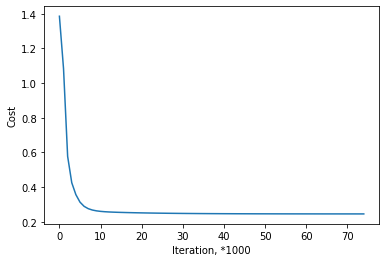

In [20]:
with HiddenPrints():
    param_grid = dict(learning_rate=learning_rate,num_iters=num_iters)
    grid = GridSearchCV(estimator=cls, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
    grid_result = grid.fit(X_train, y_train)

In [21]:
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.9732263649189279 using {'learning_rate': 0.001, 'num_iters': 5001}


In [22]:
cls = NeuralNet(layers_sizes = [3,4], normalize = True, 
                learning_rate = grid_result.best_params_['learning_rate'], 
                num_iter = grid_result.best_params_['num_iters'], 
                tol = 1e-7, costs_iters=1000,optimization=True)

Layers: 3


W1: (3, 22)
W2: (4, 3)
W3: (2, 4)
b1: (3, 1)
b2: (4, 1)
b3: (2, 1)
SdW1: (3, 22)
SdW2: (4, 3)
SdW3: (2, 4)
Sdb1: (3, 1)
Sdb2: (4, 1)
Sdb3: (2, 1)
0-th iteration: 1.3863996206647013
500-th iteration: 0.31780987293147434
1000-th iteration: 0.22560995207040235
1500-th iteration: 0.19573972635227851
2000-th iteration: 0.17982641314262937
2500-th iteration: 0.16780510797172102
3000-th iteration: 0.1571311477615172
3500-th iteration: 0.14890262201076263
4000-th iteration: 0.1422046509871185
4500-th iteration: 0.12727506678315176
5000-th iteration: 0.11528316116550685


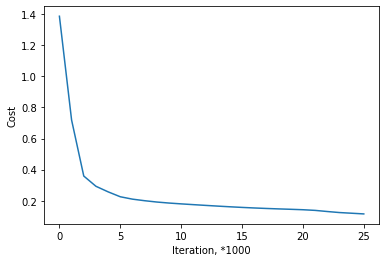

In [23]:
cls.fit(X_train, y_train)

# Sklearn Classifier

In [24]:
clf = MLPClassifier(hidden_layer_sizes = (3,4), max_iter = 16001, solver = 'adam', activation = 'relu')

In [25]:
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 4), max_iter=16001)

In [26]:
clf.n_iter_

359

# Results evaluation

### Train

In [27]:
Y_prob_tr = cls.predict_proba(X_train)
Y_prob_tr[:10]

array([[9.96007186e-03, 9.90039928e-01],
       [1.02681144e-02, 9.89731886e-01],
       [1.05293083e-02, 9.89470692e-01],
       [9.99753828e-01, 2.46171577e-04],
       [9.98441056e-01, 1.55894384e-03],
       [9.93266258e-03, 9.90067337e-01],
       [9.99897906e-01, 1.02093647e-04],
       [9.86968977e-01, 1.30310228e-02],
       [1.76019238e-02, 9.82398076e-01],
       [7.94184304e-02, 9.20581570e-01]])

In [28]:
Y_hat_tr = cls.predict(X_train)
Y_hat_tr

array([1, 1, 1, ..., 0, 1, 0])

In [29]:
np.bincount((y_train != Y_hat_tr).astype(int))[1]

96

In [30]:
print("Accuracy:")
print("Custom: {}".format(accuracy_score(y_train, Y_hat_tr)))
print("Sklearn: {}".format(accuracy_score(y_train, clf.predict(X_train))))

Accuracy:
Custom: 0.9852284966917987
Sklearn: 0.9972303431297123


### Test

In [31]:
Y_prob_t = cls.predict_proba(X_test)
Y_prob_t[:10]

array([[9.99949357e-01, 5.06434216e-05],
       [1.06035341e-02, 9.89396466e-01],
       [1.01726858e-02, 9.89827314e-01],
       [9.99752050e-01, 2.47949565e-04],
       [1.05713895e-02, 9.89428610e-01],
       [1.03698227e-02, 9.89630177e-01],
       [1.39851760e-02, 9.86014824e-01],
       [1.15544964e-02, 9.88445504e-01],
       [9.97685873e-01, 2.31412727e-03],
       [9.91836370e-01, 8.16362961e-03]])

In [32]:
Y_hat_t = cls.predict(X_test)
Y_hat_t

array([0, 1, 1, ..., 1, 1, 1])

In [33]:
np.bincount((y_test != Y_hat_t).astype(int))[1]

24

In [34]:
print(classification_report(y_test, Y_hat_t))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       843
           1       0.99      0.98      0.98       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [35]:
pd.DataFrame(confusion_matrix(y_test, Y_hat_t))

,0,1
0,833,10
1,14,768


In [36]:
print("Accuracy:")
print("Custom: {}".format(accuracy_score(y_test, Y_hat_t)))
print("Sklearn: {}".format(accuracy_score(y_test, clf.predict(X_test))))

Accuracy:
Custom: 0.9852307692307692
Sklearn: 0.9969230769230769
